In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

In [3]:
dataset = sns.load_dataset('tips')
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 1000x600 with 0 Axes>

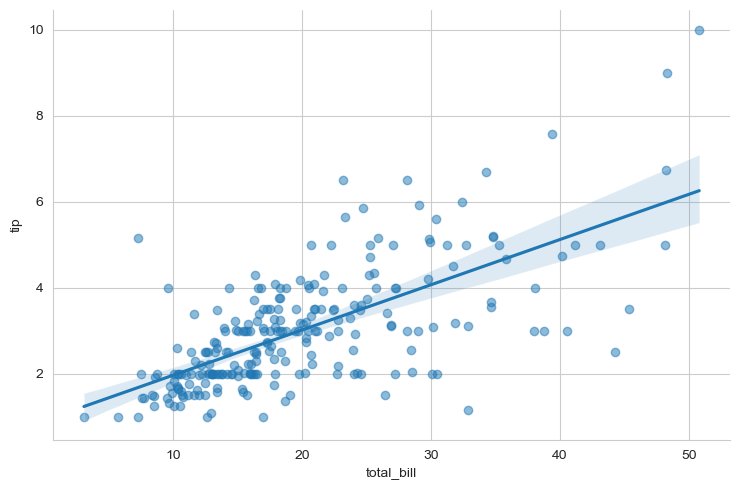

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.lmplot(x='total_bill', y='tip', data=dataset, order=1, aspect=1.5, scatter_kws={'alpha':0.5})
plt.show()
plt.close()

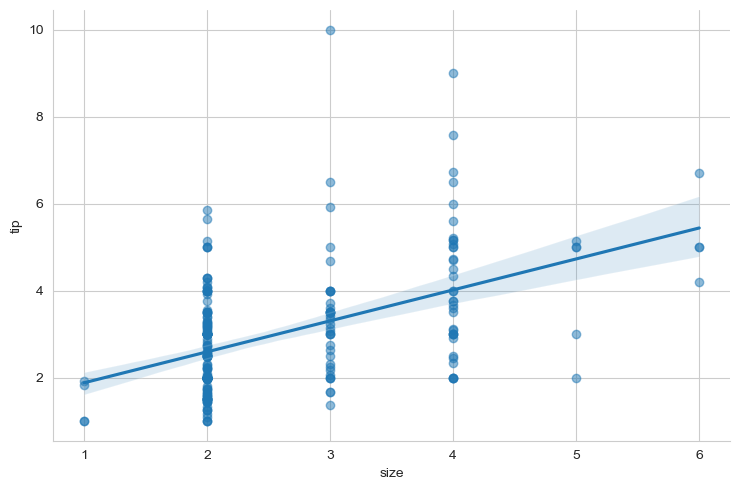

In [16]:
sns.lmplot(x='size', y='tip', data=dataset, order=1, aspect=1.5, scatter_kws={'alpha':0.5})
plt.show()
plt.close()

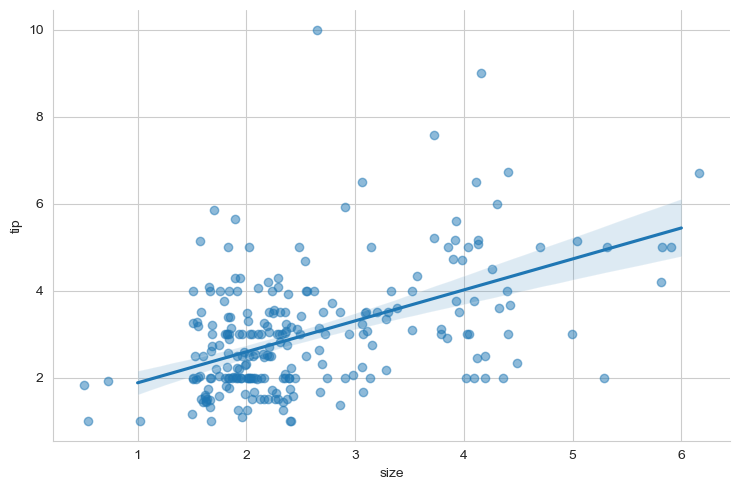

In [17]:
sns.lmplot(x='size', y='tip', data=dataset, order=1, aspect=1.5, scatter_kws={'alpha':0.5}, x_jitter=0.5)
plt.show()
plt.close()

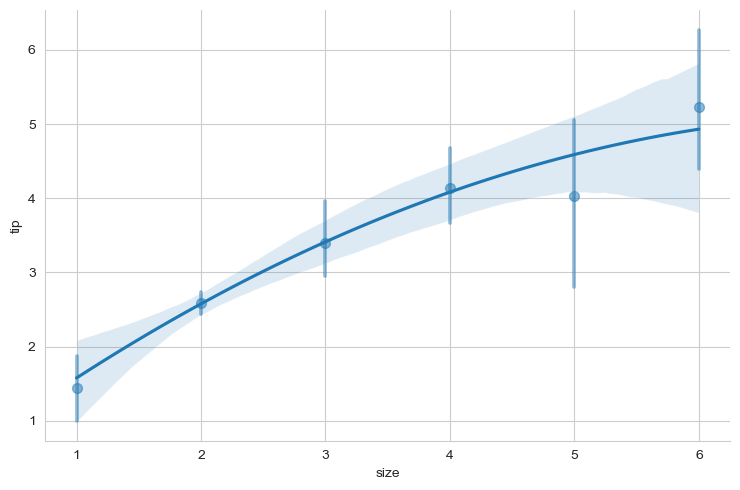

In [19]:
sns.lmplot(x='size', y='tip', data=dataset, order=2, aspect=1.5, scatter_kws={'alpha':0.5}, x_estimator=np.mean)
plt.show()
plt.close()

In [35]:
file = './access.log.txt'

In [27]:
def parse_string(x):
    return x[1:-1]

In [43]:
def parse_datetime(x):
    return pd.to_datetime(x[1:-1], format='%d/%b/%Y:%H:%M:%S')


In [72]:
data = pd.read_csv(file, skiprows=2, sep=' ', index_col=None, header=None, 
                usecols=[0,3,4,5,6,7,8],
                names=['ip', 'time', 'request', 'status', 'size', 'referrer', 'user_agent'],
                converters={
                    'time': parse_datetime,
                    'status': int,
                    'size' : lambda x: int(x) if x.isdigit() else 0,
                })
data.head()

,ip,time,request,status,size,referrer,user_agent
0,175.44.24.82,2021-02-15 18:44:37,GET /product.screen?productId=WC-SH-A02&JSESSI...,200,1184,http://www.buttercupgames.com/oldlink?itemId=E...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...
1,175.44.24.82,2021-02-15 18:44:38,GET /oldlink?itemId=EST-11&JSESSIONID=SD7SL9FF...,200,1814,http://www.buttercupgames.com/category.screen?...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...
2,175.44.24.82,2021-02-15 18:44:39,GET /oldlink?itemId=EST-6&JSESSIONID=SD7SL9FF5...,200,1073,http://www.buttercupgames.com/oldlink?itemId=E...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...
3,175.44.24.82,2021-02-15 18:44:40,POST /product.screen?productId=WC-SH-A01&JSESS...,200,3067,http://www.buttercupgames.com/product.screen?p...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...
4,175.44.24.82,2021-02-15 18:44:41,GET /product.screen?productId=FI-AG-G08&JSESSI...,200,545,http://www.buttercupgames.com/category.screen?...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...


In [47]:
data.to_csv('parsed_log.csv', index=False)

In [73]:
request = data.pop('request').str.split()

In [52]:
request[:5]

0    [GET, /product.screen?productId=WC-SH-A02&JSES...
1    [GET, /oldlink?itemId=EST-11&JSESSIONID=SD7SL9...
2    [GET, /oldlink?itemId=EST-6&JSESSIONID=SD7SL9F...
3    [POST, /product.screen?productId=WC-SH-A01&JSE...
4    [GET, /product.screen?productId=FI-AG-G08&JSES...
Name: request, dtype: object

In [74]:
data['resource'] = request.str[1]
data['method'] = request.str[0]
data['url'] = request.str[1].str.split('?').str[0]

In [75]:
dfbyhour = data.resample('H', on='time').sum()

C:\Users\luxxx\AppData\Local\Temp\ipykernel_106524\4152861479.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dfbyhour = data.resample('H', on='time').sum()


In [76]:
dfbyhour.head()

,ip,status,size,referrer,user_agent,resource,method,url
time,,,,,,,,
2021-02-15 18:00:00,175.44.24.82175.44.24.82175.44.24.82175.44.24....,2600,21906,http://www.buttercupgames.com/oldlink?itemId=E...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,/product.screen?productId=WC-SH-A02&JSESSIONID...,GETGETGETPOSTGETPOSTPOSTGETGETPOSTPOSTPOSTGET,/product.screen/oldlink/oldlink/product.screen...
2021-02-15 19:00:00,92.1.170.13592.1.170.13592.1.170.13592.1.170.1...,26123,232098,http://www.buttercupgames.comhttp://www.butter...,Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...,/category.screen?categoryId=STRATEGY&JSESSIONI...,GETGETPOSTPOSTGETGETGETGETPOSTPOSTPOSTPOSTGETG...,/category.screen/product.screen/cart.do/cart.d...
2021-02-15 20:00:00,91.214.92.2291.214.92.22128.241.220.82128.241....,14930,134487,http://www.google.comhttp://www.buttercupgames...,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,/oldlink?itemId=EST-17&JSESSIONID=SD5SL7FF2ADF...,GETGETGETPOSTGETPOSTGETPOSTGETGETGETGETGETPOST...,/oldlink/category.screen/product.screen/cart.d...
2021-02-15 21:00:00,85.62.218.8285.62.218.8285.62.218.8285.62.218....,20458,177232,http://www.buttercupgames.comhttp://www.butter...,Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...,/product.screen?productId=SC-MG-G10&JSESSIONID...,POSTGETPOSTGETGETGETGETPOSTPOSTPOSTGETPOSTPOST...,/product.screen/passwords.pdf/oldlink/category...
2021-02-15 22:00:00,217.197.192.20217.197.192.20217.197.192.20217....,8632,85650,http://www.buttercupgames.comhttp://www.butter...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,/oldlink?itemId=EST-15&JSESSIONID=SD6SL4FF8ADF...,GETGETGETGETGETGETGETGETGETGETPOSTGETPOSTGETPO...,/oldlink/category.screen/product.screen/oldlin...


In [77]:
dfbyhour['hour'] = dfbyhour.index.hour
dfbyhour['date'] = dfbyhour.index.date

In [78]:
dfbyhour

,ip,status,size,referrer,user_agent,resource,method,url,hour,date
time,,,,,,,,,,
2021-02-15 18:00:00,175.44.24.82175.44.24.82175.44.24.82175.44.24....,2600,21906,http://www.buttercupgames.com/oldlink?itemId=E...,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,/product.screen?productId=WC-SH-A02&JSESSIONID...,GETGETGETPOSTGETPOSTPOSTGETGETPOSTPOSTPOSTGET,/product.screen/oldlink/oldlink/product.screen...,18,2021-02-15
2021-02-15 19:00:00,92.1.170.13592.1.170.13592.1.170.13592.1.170.1...,26123,232098,http://www.buttercupgames.comhttp://www.butter...,Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...,/category.screen?categoryId=STRATEGY&JSESSIONI...,GETGETPOSTPOSTGETGETGETGETPOSTPOSTPOSTPOSTGETG...,/category.screen/product.screen/cart.do/cart.d...,19,2021-02-15
2021-02-15 20:00:00,91.214.92.2291.214.92.22128.241.220.82128.241....,14930,134487,http://www.google.comhttp://www.buttercupgames...,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,/oldlink?itemId=EST-17&JSESSIONID=SD5SL7FF2ADF...,GETGETGETPOSTGETPOSTGETPOSTGETGETGETGETGETPOST...,/oldlink/category.screen/product.screen/cart.d...,20,2021-02-15
2021-02-15 21:00:00,85.62.218.8285.62.218.8285.62.218.8285.62.218....,20458,177232,http://www.buttercupgames.comhttp://www.butter...,Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...,/product.screen?productId=SC-MG-G10&JSESSIONID...,POSTGETPOSTGETGETGETGETPOSTPOSTPOSTGETPOSTPOST...,/product.screen/passwords.pdf/oldlink/category...,21,2021-02-15
2021-02-15 22:00:00,217.197.192.20217.197.192.20217.197.192.20217....,8632,85650,http://www.buttercupgames.comhttp://www.butter...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,/oldlink?itemId=EST-15&JSESSIONID=SD6SL4FF8ADF...,GETGETGETGETGETGETGETGETGETGETPOSTGETPOSTGETPO...,/oldlink/category.screen/product.screen/oldlin...,22,2021-02-15
...,...,...,...,...,...,...,...,...,...,...
2021-02-22 14:00:00,211.166.11.101211.166.11.101211.166.11.101211....,18333,144233,http://www.buttercupgames.comhttp://www.butter...,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:12.0) G...,/oldlink?itemId=EST-14&JSESSIONID=SD3SL8FF9ADF...,POSTPOSTPOSTGETGETPOSTPOSTGETPOSTGETPOSTGETPOS...,/oldlink/product.screen/cart.do/product.screen...,14,2021-02-22
2021-02-22 15:00:00,94.230.166.18594.230.166.18594.230.166.18594.2...,18427,182629,http://www.buttercupgames.comhttp://www.butter...,Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US...,/oldlink?itemId=EST-13&JSESSIONID=SD0SL5FF3ADF...,GETGETGETGETPOSTPOSTPOSTGETPOSTGETGETGETGETGET...,/oldlink/cart.do/category.screen/product.scree...,15,2021-02-22
2021-02-22 16:00:00,194.215.205.19194.215.205.19194.215.205.19194....,14137,124226,http://www.buttercupgames.comhttp://www.butter...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,/oldlink?itemId=EST-6&JSESSIONID=SD3SL3FF10ADF...,GETGETGETPOSTGETPOSTPOSTPOSTGETPOSTPOSTGETGETP...,/oldlink/product.screen/category.screen/produc...,16,2021-02-22


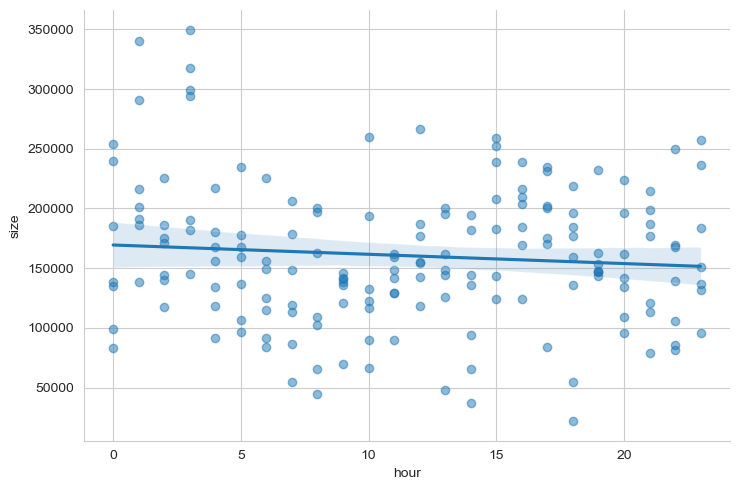

In [82]:
sns.lmplot(x='hour', y='size', data=dfbyhour, order=1, aspect=1.5, scatter_kws={'alpha':0.5})

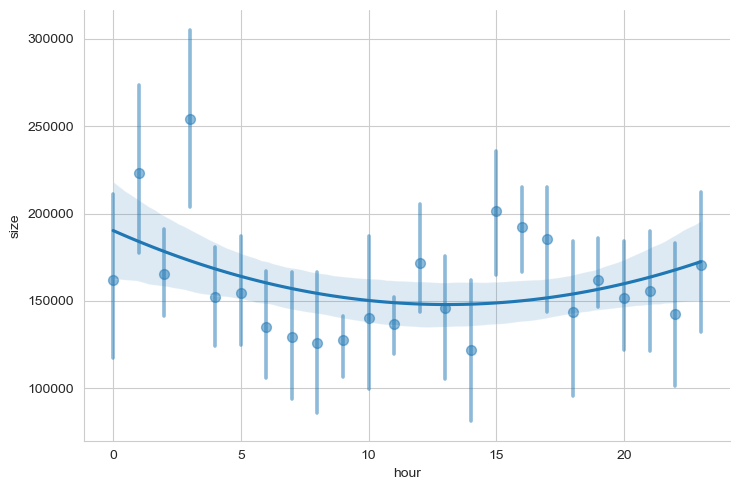

In [79]:
sns.lmplot(x='hour', y='size', data=dfbyhour, order=2, aspect=1.5, scatter_kws={'alpha':0.5}, x_estimator=np.mean)
plt.show()
plt.close()

<Axes: xlabel='hour', ylabel='size'>

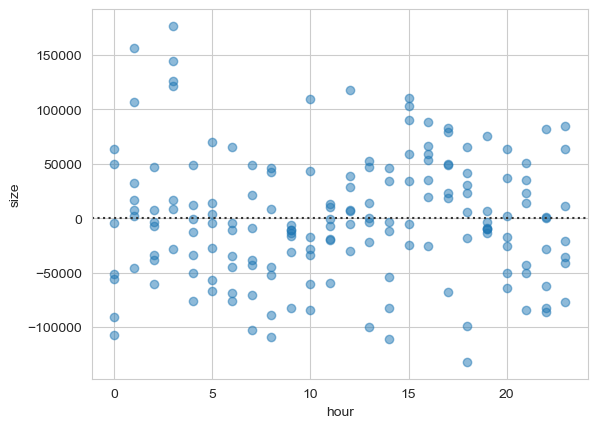

In [81]:
sns.residplot(x='hour', y='size', data=dfbyhour, order=2, scatter_kws={'alpha':0.5})